# Project 2: Choosing a Model for Predicting on Unseen Data

Before we start, please put your name and CUID in following format

: Firstname LASTNAME, #00000000   //   e.g. Nianyi LI, #12345678

**Your Answer:**   
Charanjit Singh, C15246652

# General Rules of the Project Submission

Python 3 and [Matplotlib](https://matplotlib.org/) will be used throughout the semseter, so it is important to be familiar with them. It is strongly suggested to go through [Stanford CS231n](http://cs231n.github.io/python-numpy-tutorial/) and [CS228](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) for more detailed Python and numpy tutorials if you haven't had used Python before. 

In some cells and files you will see code blocks that look like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
pass
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
y = m * x + b
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

When completing the notebook, please adhere to the following rules:
- Do not write or modify any code outside of code blocks
- Follow the instruction of the project description carefully
- Run all cells before submitting. <span style="color:red">**You will only get credit for code that has been run!**.</span>

The last point is extremely important and bears repeating:

### We will not re-run your notebook -- <span style="color:red">you will only get credit for cells that have been run</span>

### File name
Your Python program should be named **yourlastname_yourfirstname_P2.ipynb**, then zip it and upload to Canvas

### Package usage
You <span style="color:red">**cannot**</span> use python machine learning package that can have the k-fold validation algorithm as embedded function, for instance, **sklearn** package.

# Project Description

For Project 2 you will create a regression program and choose a model to predict the women’s Olympic 100-meter race record time for year **2024**. We will code the year of each race as we did in lecture 2.3. 

![caption](https://nianyil.people.clemson.edu/CPSC_4430/P2.jpg)


## Data File

A text file with the data is available on Canvas for the years 1928 through 2008 when the Olympics were held. The first line of the text file indicating there’re **m** lines of data and a **n** number of features (in this case, one). You need to write a code to read data from the file. You **can** use packages, such as **panda**, to load the data.

In [1]:
##############################################################################
#         TODO: Write the code for reading data from file                    #
##############################################################################
from math import ceil
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt

olympics_data = open("W100MTimes.txt", 'r')
no_of_years, features = olympics_data.readline().split()

# Defining y array for output values i.e. Record Time
y = np.ones((int(no_of_years),1))
# Defining x array for input values i.e. year
x = np.ones([int(no_of_years),5])

for i in range(int(no_of_years)):
    yearly_data = olympics_data.readline().split()
    x[i,1] = float(yearly_data[0])
    x[i,2] = float(yearly_data[0])**2
    x[i,3] = float(yearly_data[0])**3
    x[i,4] = float(yearly_data[0])**4
    y[i,0] = float(yearly_data[1])

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

## Pick the Best Model

Your project assignment is to compare four different models, linear, quadratic, cubic, and fourth. 

- $h_w(x) = w_0 + w_1x$
- $h_w(x) = w_0 + w_1x + w_2x^2$
- $h_w(x) = w_0 + w_1x + w_2x^2 + w_3x^3$
- $h_w(x) = w_0 + w_1x + w_2x^2 + w_3x^3 + w_4x^4$


In [2]:
##############################################################################
#                 TODO: Define the regression models                         #
##############################################################################

# weight_matrix with 4 column {w}
# Columns of weight matrix represent weights of polynomial with degree 1,2,3 and 4
w = np.zeros((5,4))
w_col = 1

for i in range(2,6):
    A = np.linalg.inv(np.dot(x[:, :i].T, x[:, :i]))
    B = np.dot(x[:, :i].T ,y)
    w[:i, w_col-1:w_col] = np.dot(A, B)
    w_col += 1

# Regression models of degree 1 to 4 have the following weight factors:
# row_headers = ['Constant Term','Coefficient of x', 'Coefficient of x^2', 'Coefficient of x^3', 'Coefficient of x^4']
# print(tabulate(w, headers=["Linear", "Quadatic", "Cubic", "Fourth Power"], showindex = row_headers))

print("Following Regression models of different degrees can be used:")
for i in range(4):
    string = f'Polynomial Degree {i+1}: '
    z = ['1' , 'x' , 'x^2', 'x^3', 'x^4']
    for k in range(5):
        if w[(k,i)] != 0:
            string += str(w[(k,i)]) + z[k] + " "
            if k != 4 and w[(k+1,i)] > 0:
                string += "+"
    print(string)
        
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Following Regression models of different degrees can be used:
Polynomial Degree 1: 12.2877113498365351 -0.015071812237272617x 
Polynomial Degree 2: 13.1307195221203161 -0.04324827058227038x +0.00020636903843955192x^2 
Polynomial Degree 3: 12.5156199062839731 -0.010222836775028554x -0.0003222176088293338x^2 +2.5952109484611574e-06x^3 
Polynomial Degree 4: 12.4475632941464541 -0.005358469596732823x -0.0004421672951543106x^2 +3.824400793981875e-06x^3 -4.471290910592099e-09x^4 


Next, you need to use <span style="color:red">**5-fold cross validation**</span> to pick out the best model for the prediction. You should present a chart of the error function $J$, similar to the one in the lecture (see below). You may need to use package like "**tabulate**" to print out the table.

```
                     Linear    Quadratic    Cubic    Fourth
-----------------  --------  -----------  -------  --------
1234                  10.25        24.25    12.25     23.25
5                     10.25        19.25    14.25     23.25
1235                  10.25        15.25    19.25     23.25
4                     10.25        10.25    20.25     23.25
1245                  10.25        24.25    12.25     23.25
3                     10.25        19.25    14.25     23.25
1345                  10.25        24.25    12.25     23.25
2                     10.25        19.25    14.25     23.25
2345                  10.25        24.25    12.25     23.25
1                     10.25        19.25    14.25     23.25
Mean for Training      0            0        0         0
Mean for Testing       0            0        0         0
```

You need to **plot** your training and testing $J$ with respect to the polynomial degree, similar to the one in the lecture.

In [3]:
##############################################################################
#                     TODO: 5-fold cross-validation                         #
##############################################################################
#calculating the distribution of folds according to the no of divisions to be made
folds = 5
items_per_fold = ceil(int(no_of_years)/folds)
fold_dict = {}
start_idx = 0
for i in range(1,folds+1):
    if start_idx + items_per_fold -1 < int(no_of_years):
        fold_dict[f'fold_{i}'] = list(range(start_idx,start_idx + items_per_fold))
    else:
        fold_dict[f'fold_{i}'] = list(range(start_idx,int(no_of_years)))
    start_idx = start_idx + items_per_fold 

#defining J_array containing the J function (cost) values for training and test sets
J_array = np.zeros((12,5),object)

for k in range(1, folds+1):
    training_folds  = "12345".replace(str(k), "")
    testing_fold = f'{k}'
    
    #defining the training and testing sets
    X_Train = x.copy()
    X_Train = np.delete(X_Train, fold_dict['fold_{}'.format(k)] , 0)
    X_Test = x[fold_dict['fold_{}'.format(k)]].copy()
    Y_Train = y.copy()
    Y_Train = np.delete(Y_Train, fold_dict['fold_{}'.format(k)] , 0)
    Y_Test = y[fold_dict['fold_{}'.format(k)]].copy()
    
    # Calculating weight_matrix {w} according to above defined training sets
    w = np.zeros((5,4))
    w_col = 1

    for i in range(2,6):
        A = np.linalg.inv(np.dot(X_Train[:, :i].T, X_Train[:, :i]))
        B = np.dot(X_Train[:, :i].T ,Y_Train)
        w[:i, w_col-1:w_col] = np.dot(A, B)
        w_col += 1
       
# To view the calculated weight matrices for each fold, uncomment below code:   
#     print(f'w-->Fold {k}')
#     print (tabulate(w, headers=["Linear", "Quadatic", "Cubic", "Fourth Power"]))
    
    # Calculating cost function for training set
    A = np.dot(X_Train, w) - Y_Train
    J1 = (1/len(X_Train))*np.dot(A.T, A)
    J1 = np .diag(J1).reshape((1,4))
    J_array[2*k-2:2*k-1,1:] = np.around(J1[:],2)
    J_array[2*k-2:2*k-1, 0] = training_folds
    
    # Calculating cost function for test set
    A = np.dot(X_Test, w) - Y_Test
    J2 = (1/len(X_Test))*np.dot(A.T, A)
    J2 = np .diag(J2).reshape((1,4))
    J_array[2*k-1:2*k,1:] = np.around(J2[:],2)
    J_array[2*k-1:2*k,0] = testing_fold

# Obtaining an diffrent array of cost function for training and test set for mean calculation
j_train = np.array([J_array[2*k] for k in range(0,5)])
j_test = np.array([J_array[2*k+1] for k in range(0,5)])

# Mean calculation
train_mean = [np.average(j_train[:, i].tolist()) for i in range(1,5)]
test_mean = [np.average(j_test[:, i].tolist()) for i in range(1,5)]
train_mean.insert(0, "Mean for Training")
test_mean.insert(0, "Mean for Testing")

J_array[10, :] = np.array(train_mean)
J_array[11, :] = np.array(test_mean)


##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

In [4]:
##############################################################################
#                     TODO: Print out the table chart                       #
##############################################################################

print (tabulate(J_array, headers=["Training Folds","Linear", "Quadatic", "Cubic", "Fourth Power"]))

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Training Folds       Linear    Quadatic    Cubic    Fourth Power
-----------------  --------  ----------  -------  --------------
2345                  0.03        0.03     0.03             0.02
1                     0.2         0.12     0.31             0.84
1345                  0.05        0.04     0.03             0.03
2                     0.04        0.04     0.03             0.03
1245                  0.05        0.04     0.04             0.04
3                     0.03        0.01     0.01             0.01
1235                  0.05        0.03     0.03             0.03
4                     0.06        0.05     0.06             0.09
1234                  0.04        0.04     0.03             0.03
5                     0.18        0.07     0.04             0.48
Mean for Training     0.044       0.036    0.032            0.03
Mean for Testing      0.102       0.058    0.09             0.29


As it is seen, that quadratic function has the least mean squared error for testing values. So, we will use a quadratic function as our regresison model.

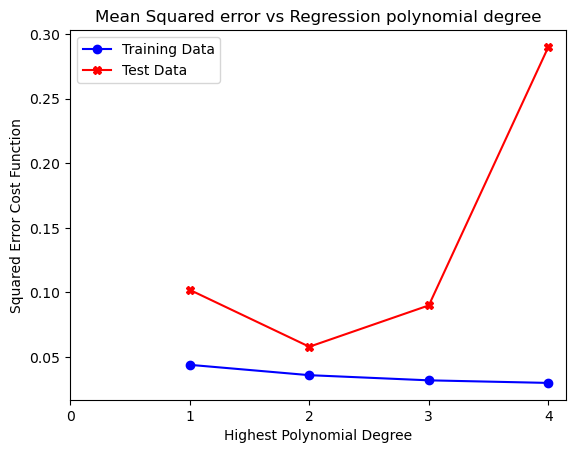

In [5]:
##############################################################################
#                     TODO: Plot the J curve                                 #
##############################################################################

pol_degree = [1,2,3,4]


train_plot = plt.plot(np.array(pol_degree), np.array(train_mean[1:]), linestyle = '-', color = 'blue', marker = 'o',label = "Training Data" )
test_plot = plt.plot(np.array(pol_degree), np.array(test_mean[1:]), linestyle = '-', color = 'red', marker = 'X', label = "Test Data")
plt.xlabel("Highest Polynomial Degree")
plt.ylabel("Squared Error Cost Function")
plt.title("Mean Squared error vs Regression polynomial degree")
plt.xticks([0, 1, 2, 3, 4])
plt.legend()
plt.savefig('Error_Func.png', bbox_inches='tight')
plt.show() 

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss **which model is the best** for the record time prediction.

**Your Answer:**  
Although the error of training data is decreasing, we consider the error that is observed in the test data as this indicates the performance of the model in the event of facing an unseen circumstance. We can see in the plot that the polynomial with degree 2 results in the least cost (i.e. mean squared error in prediction), we will declare the **POLYNOMIAL WITH DEGREE 2 AS THE BEST REGRESSION MODEL** for time prediction.

Next, compute the final weights of the best model utilizing the **complete data set**

In [6]:
##############################################################################
#              TODO: Calculate the final regression model                    #
##############################################################################

#weights of the model utilizing the complete data set
x_data = x[:,:3].copy()
y_data = y.copy()

A = np.linalg.inv(np.dot(x_data.T, x_data))
B = np.dot(x_data.T ,y_data)
w = np.around(np.dot(A, B).tolist(),4)

string = ""

for i in range(len(w)):
    print(f' Weight for x^{i}: {w[i][0]}')
    string += str(w[i][0]) + f' * x^{i}'
    if i != len(w)-1:
        string += " + "
print("As quadratic function had the least mean squared error, our final model is:")
print(string)



##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

 Weight for x^0: 13.1307
 Weight for x^1: -0.0432
 Weight for x^2: 0.0002
As quadratic function had the least mean squared error, our final model is:
13.1307 * x^0 + -0.0432 * x^1 + 0.0002 * x^2


## Prediction Using the Best Model

Write a Python program that takes a **year** as input, then outputs the winning women’s Olympic 100-meter **race time** for that year (round to two decimal places). You need to try and print out the results of **at least three different years**, and the final trial should output the race time of **2024**.

In [7]:
##############################################################################
#         TODO: Predict the race time using the best model                   #
##############################################################################
while True:
    try:
        input_year = input("Enter the year (>1900) for prediction. Type exit to leave: ")
        if(input_year.lower() != "exit"):
            input_year = int(input_year) - 1900
            X = [input_year**i for i in range(3)]
            X = np.array(X).reshape((1,3))
            y = np.around(np.dot(X,w),2)
            print(y[(0,0)])
        else:
            break
    except:
        print("Please enter a valid input!")

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Enter the year (>1900) for prediction. Type exit to leave: 1928
12.08
Enter the year (>1900) for prediction. Type exit to leave: 1952
11.43
Enter the year (>1900) for prediction. Type exit to leave: 1964
11.19
Enter the year (>1900) for prediction. Type exit to leave: 1988
10.88
Enter the year (>1900) for prediction. Type exit to leave: 2004
10.8
Enter the year (>1900) for prediction. Type exit to leave: 2024
10.85
Enter the year (>1900) for prediction. Type exit to leave: exit
